# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [58]:
# Upload airbnb_hw.csv and mn_police_use_of_force.csv into the Google Colab files
import pandas as pd
import numpy as np

# Part 1
# load the data
data = pd.read_csv('airbnb_hw.csv')

# clean the Price column
data['Price'] = data['Price'].str.replace(',', '').astype(float) # makes 1,112 -> 1112 or 145 -> 145.0

# check results
print(data['Price'].head()) #first 5 cleaned prices
print("Number of missing values:", data['Price'].isnull().sum()) # 0 missing values

# Part 2
# Load the dataset
data = pd.read_csv('mn_police_use_of_force.csv')

# calculate proportion of original missing values (a bit concerning how much missing values there is)
original_missing = data['subject_injury'].isna().mean()
print(f"Original missing values: {original_missing:.1%}")

# clean subject_injury column
data['subject_injury'] = (data['subject_injury'].fillna('No').replace({'Yes': 'Yes','No': 'No'}))
# fill missing values with 'No' which assumes missing values to mean no injury and standardize values to only Yes or No

# Cross-tabulate with force_type
injury_force_table = pd.crosstab(index = data['subject_injury'], columns = data['force_type'])

print("\nCleaned subject_injury distribution:")
print(data['subject_injury'].value_counts())

print("\nCross-tabulation with force_type:")
print(injury_force_table)
# The pattern I see is that of potential underreporting in common force types like tasers or police K9 Bites

# Part 3
# Load data
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url, low_memory=False)

# Clean WhetherDefendantWasReleasedPretrial
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace('', np.nan)

# Clean ImposedSentenceAllChargeInContactEvent
# convert all empty values to NaN
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace(r'^\s*$', np.nan, regex=True)

# convert to numeric with coercion
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'],errors='coerce')

# Results check
print("Missing in WhetherDefendantWasReleasedPretrial:", df['WhetherDefendantWasReleasedPretrial'].isna().sum())
print("Missing in ImposedSentence:", df['ImposedSentenceAllChargeInContactEvent'].isna().sum())

# Analyze patterns
missing_by_sentence_type = df.groupby('SentenceTypeAllChargesAtConvictionInContactEvent')['ImposedSentenceAllChargeInContactEvent'].apply(lambda x: x.isna().mean())
print("\nMissing proportion by sentence type:")
print(missing_by_sentence_type)

0    145.0
1     37.0
2     28.0
3    199.0
4    549.0
Name: Price, dtype: float64
Number of missing values: 0
Original missing values: 76.2%

Cleaned subject_injury distribution:
subject_injury
No     11294
Yes     1631
Name: count, dtype: int64

Cross-tabulation with force_type:
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  2          8144               1552        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             60                108           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                            

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

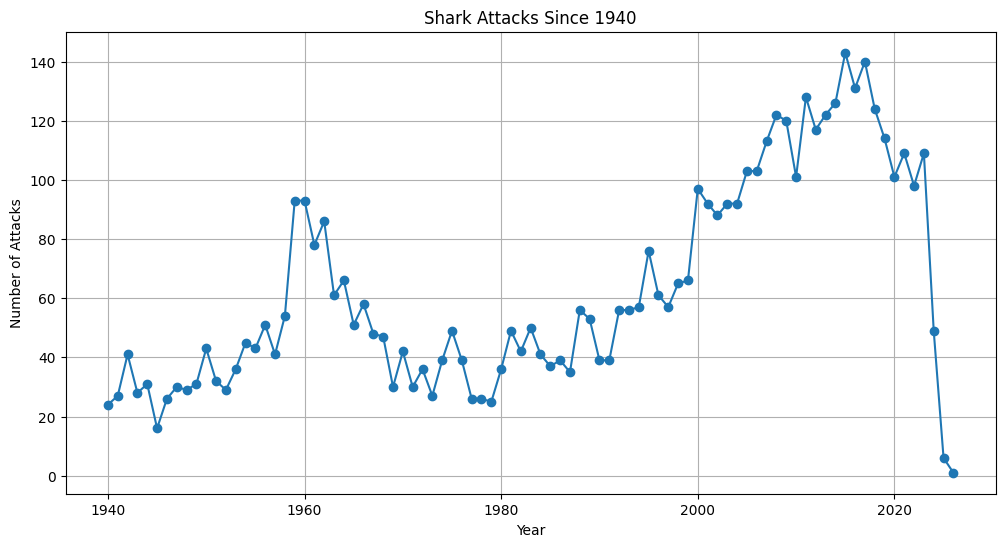

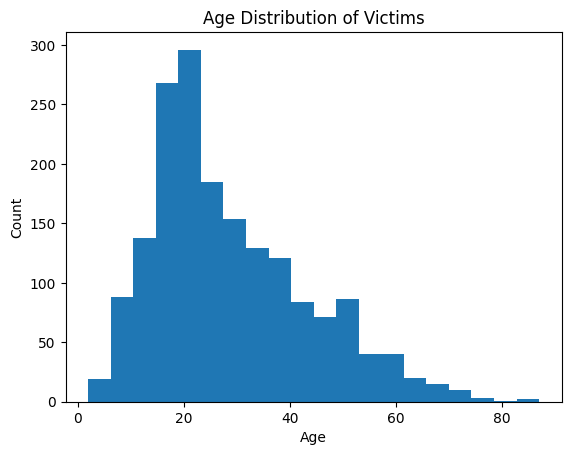


Male proportion: 85.8%
Unprovoked attacks: 74.3%
Fatality rates:
Unprovoked: 16.7%
Provoked: 2.5%

Unprovoked attacks by gender:
Men: 84.6%
Women: 15.3%

Fatality rates by gender:
Men: 15.1%
Women: 12.3%
White sharks account for 10.7% of identified attacks


In [57]:
import pandas as pd

# upload the dataset into the google colab files
# Load the dataset
df = pd.read_excel('GSAF5.xls')

# 1. Clean Year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')  # Convert to number

modern = df[df['Year'] >= 1940].copy()  # fixed error by copy

# plot to show the years as its easier to make a conclusion
# attacks are increasing, huge increase in attacks from 2000 to 2020
attacks_by_year = modern['Year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
attacks_by_year.plot(kind='line', marker='o')
plt.title('Shark Attacks Since 1940')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

# Ages of victims
modern['Age'] = pd.to_numeric(modern['Age'].str.extract('(\d+)')[0], errors='coerce')
plt.hist(modern['Age'].dropna(), bins=20)
plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 85.8 percent of victims are Male
gender_dist = modern['Sex'].str.upper().value_counts(normalize=True)
print(f"\nMale proportion: {gender_dist.get('M', 0):.1%}")

# 74.3 percent of attacks are unprovoked
modern['Type'] = (
    modern['Type']
    .str.strip()
    .str.title()
    .replace({'Unprovoked': 'Unprovoked', 'Provoked': 'Provoked'})
    .fillna('Unknown')
)
print(f"Unprovoked attacks: {modern['Type'].value_counts(normalize=True)['Unprovoked']:.1%}")

# clean fatal Y/N
modern['Fatal'] = (
    modern['Fatal Y/N']
    .str.upper()
    .replace({'Y': 'Y', 'N': 'N'})
    .fillna('Unknown')
)
# Fatality by attack type
fatality_type = pd.crosstab(modern['Fatal'], modern['Type'], normalize='columns').loc['Y'] * 100
print(f"Fatality rates:\nUnprovoked: {fatality_type['Unprovoked']:.1f}%\nProvoked: {fatality_type['Provoked']:.1f}%")

# attack frequency by gender
gender_attack = pd.crosstab(modern['Type'], modern['Sex'].str.upper(), normalize='index') * 100
print(f"\nUnprovoked attacks by gender:\nMen: {gender_attack.loc['Unprovoked', 'M']:.1f}%\nWomen: {gender_attack.loc['Unprovoked', 'F']:.1f}%")

# Fatality by gender
fatality_gender = pd.crosstab(modern['Fatal'], modern['Sex'].str.upper(), normalize='columns').loc['Y'] * 100
print(f"\nFatality rates by gender:\nMen: {fatality_gender['M']:.1f}%\nWomen: {fatality_gender['F']:.1f}%")
# I like seeing sharks and the ocean but after going through the descriptions of the aftermath of the attacks I feel a bit scared and contemplating if a shark comes up to me would I be able to get away with non-fatal injuries.

# Check for white sharks
df['White_Shark'] = df['Species '].str.contains('white|carcharodon', case=False, na=False)

# results
print(f"White sharks account for {df['White_Shark'].mean():.1%} of identified attacks")


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about a standard way to organize data for easier analysis.
2. It aims to reduce time spent cleaning data by providing a consistent structure, improve compatibility between datasets and analysis tools, and simplify sharing data across teams or projects
3. Tidy data follows a strict format, whereas messy data breaks these rules in unique ways. While variables and observations may seem intuitive, their roles depend on context.
4.
Values: individual data points
Variables: attributes measured across units
Observations: all values collected for a single unit
5. A dataset is tidy if each variable is a column, each observation is a row, and each data type is in a separate table
6. Column headers are values, multiple variables in one column, variables in rows and columns, multiple data types in one table, and one data type split across tables. Table 4 is messy because income ranges are used as column headers rather than being stored as a variable, which makes analysis hard. Melting means to transform a dataset by converting column headers into a new "income" variable and stacking values under it.
7. Table 11 is messy because daily temperatures are columns, and measurements like tmin and tmax are rows. Table 12 is tidy because each day is a row, with separate columns for tmin and tmax
8. Tidy data requires the use of tools designed for it, but these tools will not be developed unless tidy data becomes a standard.   This results in a chicken-and-egg problem in which progress in one area is dependent on progress in another. Wickham hopes that future work will improve data structures and incorporate cognitive science insights to create user-friendly data wrangling tools.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?